In [2]:
# General
import os
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn import metrics

# Classifer
from sklearn.neighbors import KNeighborsClassifier #kNN
from sklearn.naive_bayes import GaussianNB #Naive Bayes
from sklearn.tree import DecisionTreeClassifier #Decision Tree
from sklearn import svm #SVM
from sklearn.neural_network import MLPClassifier #Neural Network
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis #Linear Discriminant
from sklearn.linear_model import LogisticRegression #Logistic Regression
from sklearn.linear_model import SGDClassifier # Stochastic Gradient Descent

# PR curve
# from sklearn.metrics import average_precision_score
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import plot_precision_recall_curve
import matplotlib.pyplot as plt

# Decision Tree plot
from sklearn.externals.six import StringIO 
from IPython.display import Image 
from sklearn.tree import export_graphviz 
import pydotplus

#Cross Validation
from sklearn.model_selection import cross_val_score

/Users/becca/anaconda3/lib/python3.7/site-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)


In [3]:
def file_reader(path):
    df=pd.DataFrame()
    chunksize = 10 ** 6
    for chunk in pd.read_csv(path, chunksize=chunksize, index_col=[0]):
        df = df.append(chunk)
    return df

country='China'
data=file_reader('/Volumes/BECCA/Project/Data/Input/02_Preprocessing/05_Final/%s.csv' %country)

In [58]:
data

,tweet_text,polarity_number,subjectivity_number,repeat_tag,freq_tag,day,hour,minute,suspend
0,Necessity is the mother of invention,0.500000,0.000000,0,0,4,21,21,1
1,#病毒 Constantly defying the will of the citize...,0.425000,0.316667,1,0,3,5,9,1
2,#肺炎 #病毒 The priceless life should not be the...,0.654167,0.383333,0,0,5,2,37,1
3,"Want to see the walking dead, but feel a littl...",0.403125,0.450000,0,0,2,5,57,1
4,Maybe should call that Kekong? #HongKong #Keki...,0.500000,0.000000,0,0,4,1,39,1
...,...,...,...,...,...,...,...,...,...
44293,@ace_critic @realDonaldTrump @narendramodi The...,0.500000,0.000000,0,0,3,2,48,0
44294,RT @F1Bathurst2015: @catherine___c @tyrelle123...,0.538889,0.544444,0,0,3,9,24,0
44295,RT @YeOldHongKonger: .\nBioterorist Xi Jinping...,0.500000,0.100000,0,0,3,0,25,0
44296,@GauravS101418 @narendramodi Hahaha... So u ex...,0.600000,0.400000,0,0,3,1,57,0


In [48]:
#scaling data
from sklearn import preprocessing

min_max_scaler = preprocessing.MinMaxScaler()
for i in data.columns:
    if i != 'tweet_text':
        x = np.array(data[i]).reshape(-1,1)
        data[i] = min_max_scaler.fit_transform(x)

In [49]:
data

,tweet_text,polarity_number,subjectivity_number,repeat_tag,freq_tag,day,hour,minute,suspend
0,Necessity is the mother of invention,0.500000,0.000000,0.0,0.0,0.666667,0.913043,0.355932,1.0
1,#病毒 Constantly defying the will of the citize...,0.425000,0.316667,1.0,0.0,0.500000,0.217391,0.152542,1.0
2,#肺炎 #病毒 The priceless life should not be the...,0.654167,0.383333,0.0,0.0,0.833333,0.086957,0.627119,1.0
3,"Want to see the walking dead, but feel a littl...",0.403125,0.450000,0.0,0.0,0.333333,0.217391,0.966102,1.0
4,Maybe should call that Kekong? #HongKong #Keki...,0.500000,0.000000,0.0,0.0,0.666667,0.043478,0.661017,1.0
...,...,...,...,...,...,...,...,...,...
44293,@ace_critic @realDonaldTrump @narendramodi The...,0.500000,0.000000,0.0,0.0,0.500000,0.086957,0.813559,0.0
44294,RT @F1Bathurst2015: @catherine___c @tyrelle123...,0.538889,0.544444,0.0,0.0,0.500000,0.391304,0.406780,0.0
44295,RT @YeOldHongKonger: .\nBioterorist Xi Jinping...,0.500000,0.100000,0.0,0.0,0.500000,0.000000,0.423729,0.0
44296,@GauravS101418 @narendramodi Hahaha... So u ex...,0.600000,0.400000,0.0,0.0,0.500000,0.043478,0.966102,0.0


# kNN

In [11]:
clf_name='kNN'
parent_dir = "/Volumes/BECCA/Project/Data/Result/China/By_model"
path = os.path.join(parent_dir, clf_name)
# os.mkdir(path) 
# os.mkdir(path+'/PR_plot') 

k7=np.array(data)[:,1:8].astype('float')
k6=np.array(data)[:,2:8].astype('float')
k5=np.array(data)[:,3:8].astype('float')
k4=np.array(data)[:,3:7].astype('float')
k3=np.array(data[['repeat_tag','freq_tag','hour']]).astype('float')
k2=np.array(data[['freq_tag','hour']]).astype('float')
Tree=np.array(data[['polarity_number','subjectivity_number','hour','minute']]).astype('float')
y=np.array(data)[:,8].astype('int')

clf = KNeighborsClassifier(n_neighbors=5)

scores_1 = cross_val_score(clf, k7, y, cv=10)
scores_2 = cross_val_score(clf, k6, y, cv=10)
scores_3 = cross_val_score(clf, k5, y, cv=10)
scores_4 = cross_val_score(clf, k4, y, cv=10)
scores_5 = cross_val_score(clf, k3, y, cv=10)
scores_6 = cross_val_score(clf, k2, y, cv=10)
scores_7 = cross_val_score(clf, Tree, y, cv=10)

scores=[scores_1,scores_2,scores_3,scores_4,scores_5,scores_6,scores_7]

print('Model Selection:')
mean_score = 0
std_score = 0
for i in scores:
    mean_score += i.mean()
    std_score += i.std()
mean_score = mean_score/len(scores)

for i,j in zip(['k7','k6','k5','k4','k3','k2','Tree'], scores):    
    if j.mean() > mean_score:
        print('Score of %s = %0.2f (+/- %0.2f)' %(i, j.mean(), j.std()*2))

Model Selection:
Score of k7 = 0.79 (+/- 0.07)
Score of k6 = 0.78 (+/- 0.07)
Score of k5 = 0.76 (+/- 0.07)
Score of Tree = 0.78 (+/- 0.05)


In [12]:
#Result collection
Model=[]
Score=[]
TP=[]
FP=[] 
FN=[]
TN=[]
Recall=[]
Precision=[]
F1_Score=[]

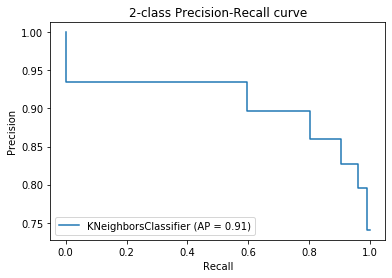

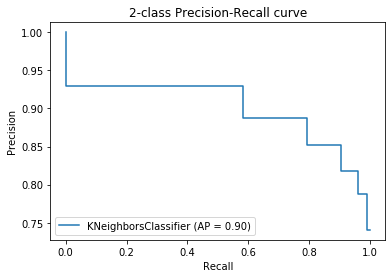

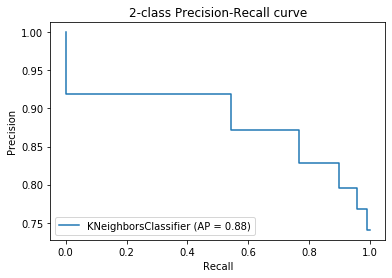

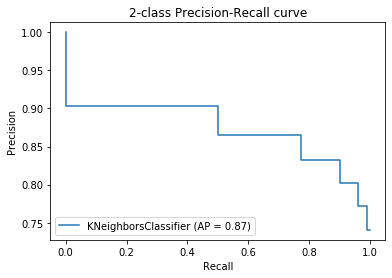

In [13]:
name = ['k7','k6','k5','Tree']
model = [k7, k6, k5, Tree]

for X, md_name in zip(model, name):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
    clf=clf.fit(X_train, y_train)
    y_pred=clf.predict(X_test)
    
    #Confusion metric & relative indexs
    tp=0
    fp=0
    fn=0
    tn=0

    for i in range(len(y_test)):
        if y_test[i] == 1:
            if y_pred[i] == 1:
                tp+=1
            elif y_pred[i] == 0:
                fn+=1
        elif y_test[i] == 0:
            if y_pred[i] == 0:
                tn+=1
            elif y_pred[i] == 1:
                fp+=1
    
    recall=tp/(tp+fn)
    precision=tp/(tp+fp)
    accuracy=(tp+tn)/len(y_test)
    f1_score=2*(recall*precision)/(recall+precision)
    
    #Result collection
    Model.append(md_name)
    Score.append(accuracy)
    TP.append(tp)
    FP.append(fp)
    FN.append(fn)
    TN.append(tn)
    Recall.append(recall)
    Precision.append(precision)
    F1_Score.append(f1_score)
    
    #PR curve
    disp = plot_precision_recall_curve(clf, X_test, y_test)
    disp.ax_.set_title('2-class Precision-Recall curve')
    plt.savefig('/Volumes/BECCA/Project/Data/Result/China/By_model/%s/PR_plot/PR_%s.png' %(clf_name, md_name))

In [14]:
Classifier=[]
for i in range(len(Score)):
    Classifier.append(clf_name)
result={'Model':Model, \
        'Classifier':Classifier,\
        'TP':TP, \
        'FP':FP, \
        'TN':TN,\
        'FN':FN, \
        'Accuracy':Score, \
        'Recall':Recall,\
        'Precision':Precision,\
        'F1_Score':F1_Score
       }

clf_result=pd.DataFrame(result)
clf_result

,Model,Classifier,TP,FP,TN,FN,Accuracy,Recall,Precision,F1_Score
0,k7,kNN,5942,971,1327,619,0.820522,0.905655,0.859540,0.881995
1,k6,kNN,5932,1031,1267,629,0.812620,0.904130,0.851932,0.877255
2,k5,kNN,5894,1220,1078,667,0.786996,0.898339,0.828507,0.862011
3,Tree,kNN,5904,1188,1110,657,0.791737,0.899863,0.832487,0.864865


# Naive Bayes

In [15]:
clf_name='gnb'
parent_dir = "/Volumes/BECCA/Project/Data/Result/China/By_model"
path = os.path.join(parent_dir, clf_name)
os.mkdir(path) 
os.mkdir(path+'/PR_plot') 

k7=np.array(data)[:,1:8].astype('float')
k6=np.array(data)[:,2:8].astype('float')
k5=np.array(data)[:,3:8].astype('float')
k4=np.array(data)[:,3:7].astype('float')
k3=np.array(data[['repeat_tag','freq_tag','hour']]).astype('float')
k2=np.array(data[['freq_tag','hour']]).astype('float')
Tree=np.array(data[['polarity_number','subjectivity_number','hour','minute']]).astype('float')
y=np.array(data)[:,8].astype('int')

clf = GaussianNB()

scores_1 = cross_val_score(clf, k7, y, cv=10)
scores_2 = cross_val_score(clf, k6, y, cv=10)
scores_3 = cross_val_score(clf, k5, y, cv=10)
scores_4 = cross_val_score(clf, k4, y, cv=10)
scores_5 = cross_val_score(clf, k3, y, cv=10)
scores_6 = cross_val_score(clf, k2, y, cv=10)
scores_7 = cross_val_score(clf, Tree, y, cv=10)

scores=[scores_1,scores_2,scores_3,scores_4,scores_5,scores_6,scores_7]

print('Model Selection:')
mean_score = 0
std_score = 0
for i in scores:
    mean_score += i.mean()
    std_score += i.std()
mean_score = mean_score/len(scores)

for i,j in zip(['k7','k6','k5','k4','k3','k2','Tree'], scores):    
    if j.mean() > mean_score:
        print('Score of %s = %0.2f (+/- %0.2f)' %(i, j.mean(), j.std()*2))

Model Selection:
Score of Tree = 0.76 (+/- 0.07)


In [16]:
#Result collection
Model=[]
Score=[]
TP=[]
FP=[] 
FN=[]
TN=[]
Recall=[]
Precision=[]
F1_Score=[]

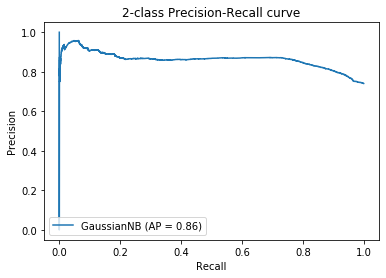

In [17]:
name = ['Tree']
model = [Tree]

for X, md_name in zip(model, name):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
    clf=clf.fit(X_train, y_train)
    y_pred=clf.predict(X_test)
    
    #Confusion metric & relative indexs
    tp=0
    fp=0
    fn=0
    tn=0

    for i in range(len(y_test)):
        if y_test[i] == 1:
            if y_pred[i] == 1:
                tp+=1
            elif y_pred[i] == 0:
                fn+=1
        elif y_test[i] == 0:
            if y_pred[i] == 0:
                tn+=1
            elif y_pred[i] == 1:
                fp+=1
    
    recall=tp/(tp+fn)
    precision=tp/(tp+fp)
    accuracy=(tp+tn)/len(y_test)
    f1_score=2*(recall*precision)/(recall+precision)
    
    #Result collection
    Model.append(md_name)
    Score.append(accuracy)
    TP.append(tp)
    FP.append(fp)
    FN.append(fn)
    TN.append(tn)
    Recall.append(recall)
    Precision.append(precision)
    F1_Score.append(f1_score)
    
    #PR curve
    disp = plot_precision_recall_curve(clf, X_test, y_test)
    disp.ax_.set_title('2-class Precision-Recall curve')
    plt.savefig('/Volumes/BECCA/Project/Data/Result/China/By_model/%s/PR_plot/PR_%s.png' %(clf_name, md_name))

In [18]:
Classifier=[]
for i in range(len(Score)):
    Classifier.append(clf_name)
result={'Model':Model, \
        'Classifier':Classifier,\
        'TP':TP, \
        'FP':FP, \
        'TN':TN,\
        'FN':FN, \
        'Accuracy':Score, \
        'Recall':Recall,\
        'Precision':Precision,\
        'F1_Score':F1_Score
       }

clf_result = clf_result.append(pd.DataFrame(result))
clf_result

,Model,Classifier,TP,FP,TN,FN,Accuracy,Recall,Precision,F1_Score
0,k7,kNN,5942,971,1327,619,0.820522,0.905655,0.859540,0.881995
1,k6,kNN,5932,1031,1267,629,0.812620,0.904130,0.851932,0.877255
2,k5,kNN,5894,1220,1078,667,0.786996,0.898339,0.828507,0.862011
3,Tree,kNN,5904,1188,1110,657,0.791737,0.899863,0.832487,0.864865
0,Tree,gnb,5979,1514,784,582,0.763404,0.911294,0.797945,0.850861


# Decision Tree

In [19]:
clf_name='dtree'
parent_dir = "/Volumes/BECCA/Project/Data/Result/China/By_model"
path = os.path.join(parent_dir, clf_name)
os.mkdir(path) 
os.mkdir(path+'/PR_plot') 

k7=np.array(data)[:,1:8].astype('float')
k6=np.array(data)[:,2:8].astype('float')
k5=np.array(data)[:,3:8].astype('float')
k4=np.array(data)[:,3:7].astype('float')
k3=np.array(data[['repeat_tag','freq_tag','hour']]).astype('float')
k2=np.array(data[['freq_tag','hour']]).astype('float')
Tree=np.array(data[['polarity_number','subjectivity_number','hour','minute']]).astype('float')
y=np.array(data)[:,8].astype('int')

clf = DecisionTreeClassifier(criterion="entropy", max_depth=4)

scores_1 = cross_val_score(clf, k7, y, cv=10)
scores_2 = cross_val_score(clf, k6, y, cv=10)
scores_3 = cross_val_score(clf, k5, y, cv=10)
scores_4 = cross_val_score(clf, k4, y, cv=10)
scores_5 = cross_val_score(clf, k3, y, cv=10)
scores_6 = cross_val_score(clf, k2, y, cv=10)
scores_7 = cross_val_score(clf, Tree, y, cv=10)

scores=[scores_1,scores_2,scores_3,scores_4,scores_5,scores_6,scores_7]

print('Model Selection:')
mean_score = 0
std_score = 0
for i in scores:
    mean_score += i.mean()
    std_score += i.std()
mean_score = mean_score/len(scores)

for i,j in zip(['k7','k6','k5','k4','k3','k2','Tree'], scores):    
    if j.mean() > mean_score:
        print('Score of %s = %0.2f (+/- %0.2f)' %(i, j.mean(), j.std()*2))

Model Selection:
Score of k3 = 0.77 (+/- 0.06)
Score of k2 = 0.76 (+/- 0.05)
Score of Tree = 0.75 (+/- 0.04)


In [20]:
#Result collection
Model=[]
Score=[]
TP=[]
FP=[] 
FN=[]
TN=[]
Recall=[]
Precision=[]
F1_Score=[]

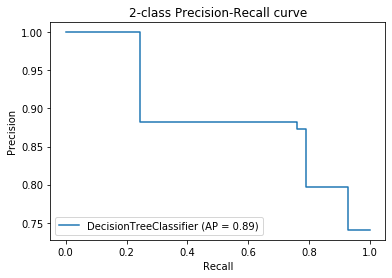

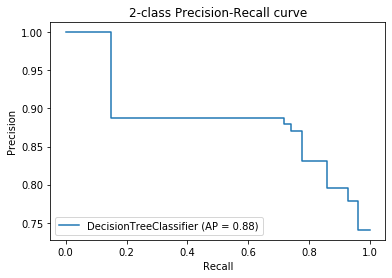

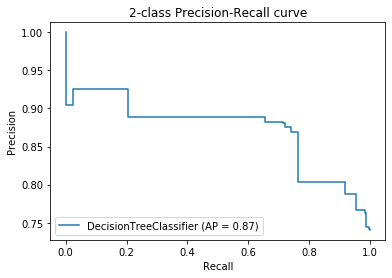

In [21]:
name = ['k3','k2','Tree']
model = [k3, k2, Tree]

for X, md_name in zip(model, name):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
    clf=clf.fit(X_train, y_train)
    y_pred=clf.predict(X_test)
    
    #Confusion metric & relative indexs
    tp=0
    fp=0
    fn=0
    tn=0

    for i in range(len(y_test)):
        if y_test[i] == 1:
            if y_pred[i] == 1:
                tp+=1
            elif y_pred[i] == 0:
                fn+=1
        elif y_test[i] == 0:
            if y_pred[i] == 0:
                tn+=1
            elif y_pred[i] == 1:
                fp+=1
    
    recall=tp/(tp+fn)
    precision=tp/(tp+fp)
    accuracy=(tp+tn)/len(y_test)
    f1_score=2*(recall*precision)/(recall+precision)
    
    #Result collection
    Model.append(md_name)
    Score.append(accuracy)
    TP.append(tp)
    FP.append(fp)
    FN.append(fn)
    TN.append(tn)
    Recall.append(recall)
    Precision.append(precision)
    F1_Score.append(f1_score)
    
    #PR curve
    disp = plot_precision_recall_curve(clf, X_test, y_test)
    disp.ax_.set_title('2-class Precision-Recall curve')
    plt.savefig('/Volumes/BECCA/Project/Data/Result/China/By_model/%s/PR_plot/PR_%s.png' %(clf_name, md_name))

In [22]:
Classifier=[]
for i in range(len(Score)):
    Classifier.append(clf_name)
result={'Model':Model, \
        'Classifier':Classifier,\
        'TP':TP, \
        'FP':FP, \
        'TN':TN,\
        'FN':FN, \
        'Accuracy':Score, \
        'Recall':Recall,\
        'Precision':Precision,\
        'F1_Score':F1_Score
       }

clf_result = clf_result.append(pd.DataFrame(result))
clf_result

,Model,Classifier,TP,FP,TN,FN,Accuracy,Recall,Precision,F1_Score
0,k7,kNN,5942,971,1327,619,0.820522,0.905655,0.859540,0.881995
1,k6,kNN,5932,1031,1267,629,0.812620,0.904130,0.851932,0.877255
2,k5,kNN,5894,1220,1078,667,0.786996,0.898339,0.828507,0.862011
3,Tree,kNN,5904,1188,1110,657,0.791737,0.899863,0.832487,0.864865
0,Tree,gnb,5979,1514,784,582,0.763404,0.911294,0.797945,0.850861
0,k3,dtree,6096,1559,739,465,0.771532,0.929127,0.796342,0.857625
1,k2,dtree,6311,1789,509,250,0.769839,0.961896,0.779136,0.860924
2,Tree,dtree,6257,1686,612,304,0.775370,0.953666,0.787738,0.862796


# SVM

In [23]:
clf_name='SVM'
parent_dir = "/Volumes/BECCA/Project/Data/Result/China/By_model"
path = os.path.join(parent_dir, clf_name)
os.mkdir(path) 
os.mkdir(path+'/PR_plot') 

k7=np.array(data)[:,1:8].astype('float')
k6=np.array(data)[:,2:8].astype('float')
k5=np.array(data)[:,3:8].astype('float')
k4=np.array(data)[:,3:7].astype('float')
k3=np.array(data[['repeat_tag','freq_tag','hour']]).astype('float')
k2=np.array(data[['freq_tag','hour']]).astype('float')
Tree=np.array(data[['polarity_number','subjectivity_number','hour','minute']]).astype('float')
y=np.array(data)[:,8].astype('int')

clf = svm.SVC(kernel='poly')

scores_1 = cross_val_score(clf, k7, y, cv=10)
scores_2 = cross_val_score(clf, k6, y, cv=10)
scores_3 = cross_val_score(clf, k5, y, cv=10)
scores_4 = cross_val_score(clf, k4, y, cv=10)
scores_5 = cross_val_score(clf, k3, y, cv=10)
scores_6 = cross_val_score(clf, k2, y, cv=10)
scores_7 = cross_val_score(clf, Tree, y, cv=10)

scores=[scores_1,scores_2,scores_3,scores_4,scores_5,scores_6,scores_7]

print('Model Selection:')
mean_score = 0
std_score = 0
for i in scores:
    mean_score += i.mean()
    std_score += i.std()
mean_score = mean_score/len(scores)

for i,j in zip(['k7','k6','k5','k4','k3','k2','Tree'], scores):    
    if j.mean() > mean_score:
        print('Score of %s = %0.2f (+/- %0.2f)' %(i, j.mean(), j.std()*2))

Model Selection:
Score of k3 = 0.77 (+/- 0.07)
Score of k2 = 0.77 (+/- 0.07)


In [24]:
#Result collection
Model=[]
Score=[]
TP=[]
FP=[] 
FN=[]
TN=[]
Recall=[]
Precision=[]
F1_Score=[]

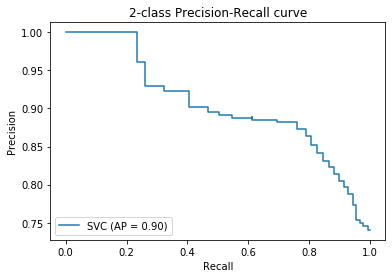

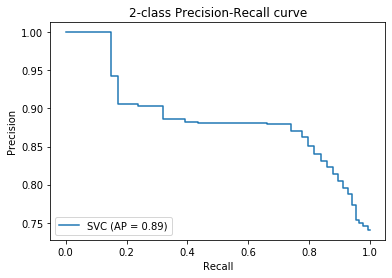

In [25]:
name = ['k3','k2']
model = [k3, k2]

for X, md_name in zip(model, name):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
    clf=clf.fit(X_train, y_train)
    y_pred=clf.predict(X_test)
    
    #Confusion metric & relative indexs
    tp=0
    fp=0
    fn=0
    tn=0

    for i in range(len(y_test)):
        if y_test[i] == 1:
            if y_pred[i] == 1:
                tp+=1
            elif y_pred[i] == 0:
                fn+=1
        elif y_test[i] == 0:
            if y_pred[i] == 0:
                tn+=1
            elif y_pred[i] == 1:
                fp+=1
    
    recall=tp/(tp+fn)
    precision=tp/(tp+fp)
    accuracy=(tp+tn)/len(y_test)
    f1_score=2*(recall*precision)/(recall+precision)
    
    #Result collection
    Model.append(md_name)
    Score.append(accuracy)
    TP.append(tp)
    FP.append(fp)
    FN.append(fn)
    TN.append(tn)
    Recall.append(recall)
    Precision.append(precision)
    F1_Score.append(f1_score)
    
    #PR curve
    disp = plot_precision_recall_curve(clf, X_test, y_test)
    disp.ax_.set_title('2-class Precision-Recall curve')
    plt.savefig('/Volumes/BECCA/Project/Data/Result/China/By_model/%s/PR_plot/PR_%s.png' %(clf_name, md_name))

In [26]:
Classifier=[]
for i in range(len(Score)):
    Classifier.append(clf_name)
result={'Model':Model, \
        'Classifier':Classifier,\
        'TP':TP, \
        'FP':FP, \
        'TN':TN,\
        'FN':FN, \
        'Accuracy':Score, \
        'Recall':Recall,\
        'Precision':Precision,\
        'F1_Score':F1_Score
       }

clf_result = clf_result.append(pd.DataFrame(result))
clf_result

,Model,Classifier,TP,FP,TN,FN,Accuracy,Recall,Precision,F1_Score
0,k7,kNN,5942,971,1327,619,0.820522,0.905655,0.859540,0.881995
1,k6,kNN,5932,1031,1267,629,0.812620,0.904130,0.851932,0.877255
2,k5,kNN,5894,1220,1078,667,0.786996,0.898339,0.828507,0.862011
3,Tree,kNN,5904,1188,1110,657,0.791737,0.899863,0.832487,0.864865
0,Tree,gnb,5979,1514,784,582,0.763404,0.911294,0.797945,0.850861
0,k3,dtree,6096,1559,739,465,0.771532,0.929127,0.796342,0.857625
1,k2,dtree,6311,1789,509,250,0.769839,0.961896,0.779136,0.860924
2,Tree,dtree,6257,1686,612,304,0.775370,0.953666,0.787738,0.862796
0,k3,SVM,6096,1559,739,465,0.771532,0.929127,0.796342,0.857625
1,k2,SVM,6081,1557,741,480,0.770064,0.926840,0.796151,0.856539


## Neural Network 

In [27]:
clf_name='nn'
parent_dir = "/Volumes/BECCA/Project/Data/Result/China/By_model"
path = os.path.join(parent_dir, clf_name)
os.mkdir(path) 
os.mkdir(path+'/PR_plot') 

k7=np.array(data)[:,1:8].astype('float')
k6=np.array(data)[:,2:8].astype('float')
k5=np.array(data)[:,3:8].astype('float')
k4=np.array(data)[:,3:7].astype('float')
k3=np.array(data[['repeat_tag','freq_tag','hour']]).astype('float')
k2=np.array(data[['freq_tag','hour']]).astype('float')
Tree=np.array(data[['polarity_number','subjectivity_number','hour','minute']]).astype('float')
y=np.array(data)[:,8].astype('int')

clf = MLPClassifier(activation='identity',solver='adam', max_iter=1000)

scores_1 = cross_val_score(clf, k7, y, cv=10)
scores_2 = cross_val_score(clf, k6, y, cv=10)
scores_3 = cross_val_score(clf, k5, y, cv=10)
scores_4 = cross_val_score(clf, k4, y, cv=10)
scores_5 = cross_val_score(clf, k3, y, cv=10)
scores_6 = cross_val_score(clf, k2, y, cv=10)
scores_7 = cross_val_score(clf, Tree, y, cv=10)

scores=[scores_1,scores_2,scores_3,scores_4,scores_5,scores_6,scores_7]

print('Model Selection:')
mean_score = 0
std_score = 0
for i in scores:
    mean_score += i.mean()
    std_score += i.std()
mean_score = mean_score/len(scores)

for i,j in zip(['k7','k6','k5','k4','k3','k2','Tree'], scores):    
    if j.mean() > mean_score:
        print('Score of %s = %0.2f (+/- %0.2f)' %(i, j.mean(), j.std()*2))

Model Selection:
Score of k6 = 0.77 (+/- 0.07)
Score of k5 = 0.77 (+/- 0.07)
Score of k4 = 0.77 (+/- 0.07)
Score of k3 = 0.77 (+/- 0.07)
Score of k2 = 0.77 (+/- 0.07)


In [28]:
#Result collection
Model=[]
Score=[]
TP=[]
FP=[] 
FN=[]
TN=[]
Recall=[]
Precision=[]
F1_Score=[]

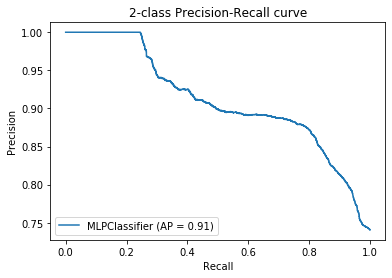

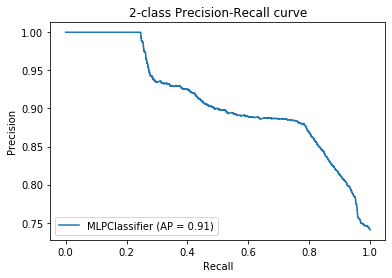

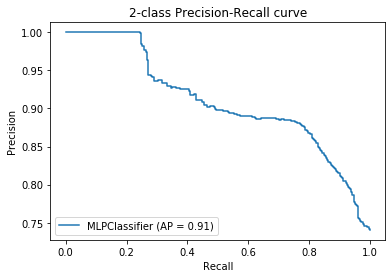

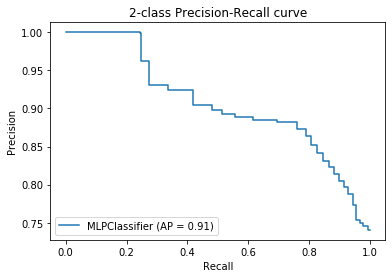

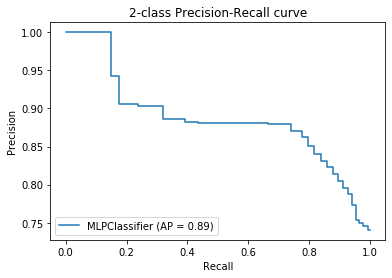

In [29]:
name = ['k6','k5','k4','k3','k2']
model = [k6, k5, k4, k3, k2]

for X, md_name in zip(model, name):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
    clf=clf.fit(X_train, y_train)
    y_pred=clf.predict(X_test)
    
    #Confusion metric & relative indexs
    tp=0
    fp=0
    fn=0
    tn=0

    for i in range(len(y_test)):
        if y_test[i] == 1:
            if y_pred[i] == 1:
                tp+=1
            elif y_pred[i] == 0:
                fn+=1
        elif y_test[i] == 0:
            if y_pred[i] == 0:
                tn+=1
            elif y_pred[i] == 1:
                fp+=1
    
    recall=tp/(tp+fn)
    precision=tp/(tp+fp)
    accuracy=(tp+tn)/len(y_test)
    f1_score=2*(recall*precision)/(recall+precision)
    
    #Result collection
    Model.append(md_name)
    Score.append(accuracy)
    TP.append(tp)
    FP.append(fp)
    FN.append(fn)
    TN.append(tn)
    Recall.append(recall)
    Precision.append(precision)
    F1_Score.append(f1_score)
    
    #PR curve
    disp = plot_precision_recall_curve(clf, X_test, y_test)
    disp.ax_.set_title('2-class Precision-Recall curve')
    plt.savefig('/Volumes/BECCA/Project/Data/Result/China/By_model/%s/PR_plot/PR_%s.png' %(clf_name, md_name))

In [30]:
Classifier=[]
for i in range(len(Score)):
    Classifier.append(clf_name)
result={'Model':Model, \
        'Classifier':Classifier,\
        'TP':TP, \
        'FP':FP, \
        'TN':TN,\
        'FN':FN, \
        'Accuracy':Score, \
        'Recall':Recall,\
        'Precision':Precision,\
        'F1_Score':F1_Score
       }

clf_result = clf_result.append(pd.DataFrame(result))
clf_result

,Model,Classifier,TP,FP,TN,FN,Accuracy,Recall,Precision,F1_Score
0,k7,kNN,5942,971,1327,619,0.820522,0.905655,0.859540,0.881995
1,k6,kNN,5932,1031,1267,629,0.812620,0.904130,0.851932,0.877255
2,k5,kNN,5894,1220,1078,667,0.786996,0.898339,0.828507,0.862011
3,Tree,kNN,5904,1188,1110,657,0.791737,0.899863,0.832487,0.864865
0,Tree,gnb,5979,1514,784,582,0.763404,0.911294,0.797945,0.850861
0,k3,dtree,6096,1559,739,465,0.771532,0.929127,0.796342,0.857625
1,k2,dtree,6311,1789,509,250,0.769839,0.961896,0.779136,0.860924
2,Tree,dtree,6257,1686,612,304,0.775370,0.953666,0.787738,0.862796
0,k3,SVM,6096,1559,739,465,0.771532,0.929127,0.796342,0.857625
1,k2,SVM,6081,1557,741,480,0.770064,0.926840,0.796151,0.856539


# Logistic Regression

In [35]:
clf_name='lr'
parent_dir = "/Volumes/BECCA/Project/Data/Result/China/By_model"
path = os.path.join(parent_dir, clf_name)
os.mkdir(path) 
os.mkdir(path+'/PR_plot') 

k7=np.array(data)[:,1:8].astype('float')
k6=np.array(data)[:,2:8].astype('float')
k5=np.array(data)[:,3:8].astype('float')
k4=np.array(data)[:,3:7].astype('float')
k3=np.array(data[['repeat_tag','freq_tag','hour']]).astype('float')
k2=np.array(data[['freq_tag','hour']]).astype('float')
Tree=np.array(data[['polarity_number','subjectivity_number','hour','minute']]).astype('float')
y=np.array(data)[:,8].astype('int')

clf = LogisticRegression(random_state=0)

scores_1 = cross_val_score(clf, k7, y, cv=10)
scores_2 = cross_val_score(clf, k6, y, cv=10)
scores_3 = cross_val_score(clf, k5, y, cv=10)
scores_4 = cross_val_score(clf, k4, y, cv=10)
scores_5 = cross_val_score(clf, k3, y, cv=10)
scores_6 = cross_val_score(clf, k2, y, cv=10)
scores_7 = cross_val_score(clf, Tree, y, cv=10)

scores=[scores_1,scores_2,scores_3,scores_4,scores_5,scores_6,scores_7]

print('Model Selection:')
mean_score = 0
std_score = 0
for i in scores:
    mean_score += i.mean()
    std_score += i.std()
mean_score = mean_score/len(scores)

for i,j in zip(['k7','k6','k5','k4','k3','k2','Tree'], scores):    
    if j.mean() > mean_score:
        print('Score of %s = %0.2f (+/- %0.2f)' %(i, j.mean(), j.std()*2))

Model Selection:
Score of k5 = 0.77 (+/- 0.07)
Score of k3 = 0.77 (+/- 0.07)
Score of k2 = 0.77 (+/- 0.07)


In [36]:
#Result collection
Model=[]
Score=[]
TP=[]
FP=[] 
FN=[]
TN=[]
Recall=[]
Precision=[]
F1_Score=[]

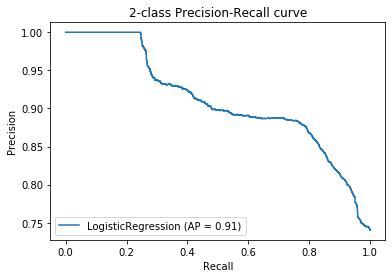

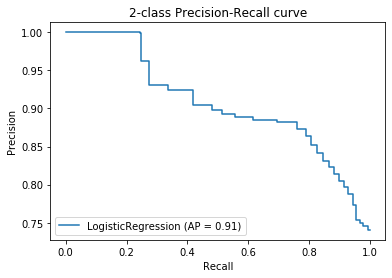

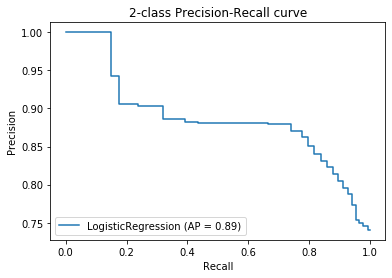

In [37]:
name = ['k5','k3','k2']
model = [k5, k3, k2]

for X, md_name in zip(model, name):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
    clf=clf.fit(X_train, y_train)
    y_pred=clf.predict(X_test)
    
    #Confusion metric & relative indexs
    tp=0
    fp=0
    fn=0
    tn=0

    for i in range(len(y_test)):
        if y_test[i] == 1:
            if y_pred[i] == 1:
                tp+=1
            elif y_pred[i] == 0:
                fn+=1
        elif y_test[i] == 0:
            if y_pred[i] == 0:
                tn+=1
            elif y_pred[i] == 1:
                fp+=1
    
    recall=tp/(tp+fn)
    precision=tp/(tp+fp)
    accuracy=(tp+tn)/len(y_test)
    f1_score=2*(recall*precision)/(recall+precision)
    
    #Result collection
    Model.append(md_name)
    Score.append(accuracy)
    TP.append(tp)
    FP.append(fp)
    FN.append(fn)
    TN.append(tn)
    Recall.append(recall)
    Precision.append(precision)
    F1_Score.append(f1_score)
    
    #PR curve
    disp = plot_precision_recall_curve(clf, X_test, y_test)
    disp.ax_.set_title('2-class Precision-Recall curve')
    plt.savefig('/Volumes/BECCA/Project/Data/Result/China/By_model/%s/PR_plot/PR_%s.png' %(clf_name, md_name))

In [38]:
Classifier=[]
for i in range(len(Score)):
    Classifier.append(clf_name)
result={'Model':Model, \
        'Classifier':Classifier,\
        'TP':TP, \
        'FP':FP, \
        'TN':TN,\
        'FN':FN, \
        'Accuracy':Score, \
        'Recall':Recall,\
        'Precision':Precision,\
        'F1_Score':F1_Score
       }

clf_result = clf_result.append(pd.DataFrame(result))
clf_result

,Model,Classifier,TP,FP,TN,FN,Accuracy,Recall,Precision,F1_Score
0,k7,kNN,5942,971,1327,619,0.820522,0.905655,0.859540,0.881995
1,k6,kNN,5932,1031,1267,629,0.812620,0.904130,0.851932,0.877255
2,k5,kNN,5894,1220,1078,667,0.786996,0.898339,0.828507,0.862011
3,Tree,kNN,5904,1188,1110,657,0.791737,0.899863,0.832487,0.864865
0,Tree,gnb,5979,1514,784,582,0.763404,0.911294,0.797945,0.850861
0,k3,dtree,6096,1559,739,465,0.771532,0.929127,0.796342,0.857625
1,k2,dtree,6311,1789,509,250,0.769839,0.961896,0.779136,0.860924
2,Tree,dtree,6257,1686,612,304,0.775370,0.953666,0.787738,0.862796
0,k3,SVM,6096,1559,739,465,0.771532,0.929127,0.796342,0.857625
1,k2,SVM,6081,1557,741,480,0.770064,0.926840,0.796151,0.856539


# SGD

In [39]:
clf_name='sgd'
parent_dir = "/Volumes/BECCA/Project/Data/Result/China/By_model"
path = os.path.join(parent_dir, clf_name)
os.mkdir(path) 
os.mkdir(path+'/PR_plot') 

k7=np.array(data)[:,1:8].astype('float')
k6=np.array(data)[:,2:8].astype('float')
k5=np.array(data)[:,3:8].astype('float')
k4=np.array(data)[:,3:7].astype('float')
k3=np.array(data[['repeat_tag','freq_tag','hour']]).astype('float')
k2=np.array(data[['freq_tag','hour']]).astype('float')
Tree=np.array(data[['polarity_number','subjectivity_number','hour','minute']]).astype('float')
y=np.array(data)[:,8].astype('int')

sgd = SGDClassifier(loss="hinge", penalty="elasticnet", max_iter=1000)

scores_1 = cross_val_score(clf, k7, y, cv=10)
scores_2 = cross_val_score(clf, k6, y, cv=10)
scores_3 = cross_val_score(clf, k5, y, cv=10)
scores_4 = cross_val_score(clf, k4, y, cv=10)
scores_5 = cross_val_score(clf, k3, y, cv=10)
scores_6 = cross_val_score(clf, k2, y, cv=10)
scores_7 = cross_val_score(clf, Tree, y, cv=10)

scores=[scores_1,scores_2,scores_3,scores_4,scores_5,scores_6,scores_7]

print('Model Selection:')
mean_score = 0
std_score = 0
for i in scores:
    mean_score += i.mean()
    std_score += i.std()
mean_score = mean_score/len(scores)

for i,j in zip(['k7','k6','k5','k4','k3','k2','Tree'], scores):    
    if j.mean() > mean_score:
        print('Score of %s = %0.2f (+/- %0.2f)' %(i, j.mean(), j.std()*2))

Model Selection:
Score of k5 = 0.77 (+/- 0.07)
Score of k3 = 0.77 (+/- 0.07)
Score of k2 = 0.77 (+/- 0.07)


In [40]:
#Result collection
Model=[]
Score=[]
TP=[]
FP=[] 
FN=[]
TN=[]
Recall=[]
Precision=[]
F1_Score=[]

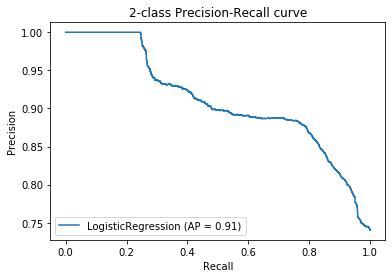

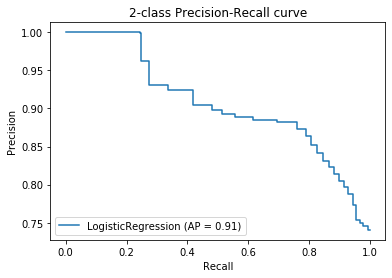

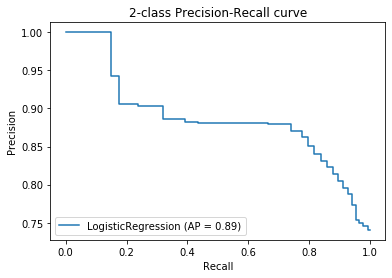

In [41]:
name = ['k5', 'k3', 'k2']
model = [k5, k3, k2]

for X, md_name in zip(model, name):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
    clf=clf.fit(X_train, y_train)
    y_pred=clf.predict(X_test)
    
    #Confusion metric & relative indexs
    tp=0
    fp=0
    fn=0
    tn=0

    for i in range(len(y_test)):
        if y_test[i] == 1:
            if y_pred[i] == 1:
                tp+=1
            elif y_pred[i] == 0:
                fn+=1
        elif y_test[i] == 0:
            if y_pred[i] == 0:
                tn+=1
            elif y_pred[i] == 1:
                fp+=1
    
    recall=tp/(tp+fn)
    precision=tp/(tp+fp)
    accuracy=(tp+tn)/len(y_test)
    f1_score=2*(recall*precision)/(recall+precision)
    
    #Result collection
    Model.append(md_name)
    Score.append(accuracy)
    TP.append(tp)
    FP.append(fp)
    FN.append(fn)
    TN.append(tn)
    Recall.append(recall)
    Precision.append(precision)
    F1_Score.append(f1_score)
    
    #PR curve
    disp = plot_precision_recall_curve(clf, X_test, y_test)
    disp.ax_.set_title('2-class Precision-Recall curve')
    plt.savefig('/Volumes/BECCA/Project/Data/Result/China/By_model/%s/PR_plot/PR_%s.png' %(clf_name, md_name))

In [42]:
Classifier=[]
for i in range(len(Score)):
    Classifier.append(clf_name)
result={'Model':Model, \
        'Classifier':Classifier,\
        'TP':TP, \
        'FP':FP, \
        'TN':TN,\
        'FN':FN, \
        'Accuracy':Score, \
        'Recall':Recall,\
        'Precision':Precision,\
        'F1_Score':F1_Score
       }

clf_result = clf_result.append(pd.DataFrame(result))
clf_result

,Model,Classifier,TP,FP,TN,FN,Accuracy,Recall,Precision,F1_Score
0,k7,kNN,5942,971,1327,619,0.820522,0.905655,0.859540,0.881995
1,k6,kNN,5932,1031,1267,629,0.812620,0.904130,0.851932,0.877255
2,k5,kNN,5894,1220,1078,667,0.786996,0.898339,0.828507,0.862011
3,Tree,kNN,5904,1188,1110,657,0.791737,0.899863,0.832487,0.864865
0,Tree,gnb,5979,1514,784,582,0.763404,0.911294,0.797945,0.850861
0,k3,dtree,6096,1559,739,465,0.771532,0.929127,0.796342,0.857625
1,k2,dtree,6311,1789,509,250,0.769839,0.961896,0.779136,0.860924
2,Tree,dtree,6257,1686,612,304,0.775370,0.953666,0.787738,0.862796
0,k3,SVM,6096,1559,739,465,0.771532,0.929127,0.796342,0.857625
1,k2,SVM,6081,1557,741,480,0.770064,0.926840,0.796151,0.856539


In [22]:
clf_result = clf_result.reset_index()
clf_result = clf_result.drop(['index'],axis=1)
clf_result.to_csv('/Volumes/BECCA/Project/Data/Result/China/By_model/Total_Result.csv')

In [23]:
clf_result

,Model,Classifier,TP,FP,TN,FN,Accuracy,Recall,Precision,F1_Score
0,k7,kNN,5942,971,1327,619,0.820522,0.905655,0.859540,0.881995
1,k6,kNN,5932,1031,1267,629,0.812620,0.904130,0.851932,0.877255
2,k5,kNN,5894,1220,1078,667,0.786996,0.898339,0.828507,0.862011
3,Tree,kNN,5904,1188,1110,657,0.791737,0.899863,0.832487,0.864865
4,Tree,gnb,5979,1514,784,582,0.763404,0.911294,0.797945,0.850861
5,k3,dtree,6096,1559,739,465,0.771532,0.929127,0.796342,0.857625
6,k2,dtree,6311,1789,509,250,0.769839,0.961896,0.779136,0.860924
7,Tree,dtree,6257,1686,612,304,0.775370,0.953666,0.787738,0.862796
8,k3,SVM,6096,1559,739,465,0.771532,0.929127,0.796342,0.857625
9,k2,SVM,6081,1557,741,480,0.770064,0.926840,0.796151,0.856539
